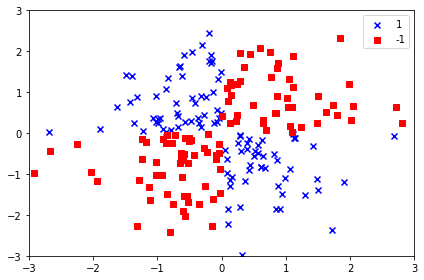

In [9]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(3)

# [[1, 5], [4, 5], [2, 6]...]
X_xor = np.random.randn(200, 2)
# [ True, False,  True,  True,...]
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
# [1, 0, 1, 1, ...]
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x', label='1')

plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])

plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  # set marker * colors
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 결정경계를 그린다.
  x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.9, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

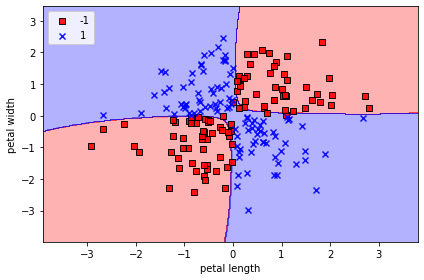

In [26]:
# 커널함수로써 방사 기저 함수(Radical Basis Function, RBF) 사용
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, C=10.0, gamma=0.10)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=svm)

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()